Artificial Neural Network ()
Image Classification model using neural networks

Two libraries

1. TensorFlow: keras: high level API built on top of tensorflow  Francious Chollet:  Book on deep learning
It give us predefined methods to work or access th4e power of neural networks

2. Pytorch
library which uses functional programming



In [1]:
import tensorflow as tf

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.10.0


Imoport the fashion mnist data
MNIST: images of hand written digits in greyscale

FashionMNIST: 70000 grayscale images in 10 categories
low resolution: 28 x 28 pixels

indivual articles of clothing and related accesories
10 categories: in the form of index positions

split of data: train and test.  Upload from keras cloud dataset library
60k: train
10k: test

tensorflow.org/datasets/catalog/fashion_mnist


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


use numpy to convert images to arrays

loading the dataset are in the form of arrays
iamges are in 28x28 px the pixel values range from 0-2255

In [5]:
# labels are available in the form of the index positions 0 - 9

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

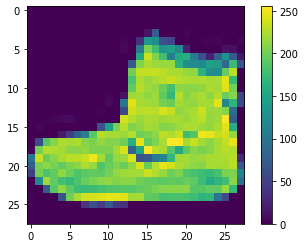

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() #0-255
plt.grid(False)
plt.show()

every image is an array of pixel values ranging from 0-255
I need to normalize the pixel values 0-1

In [17]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0


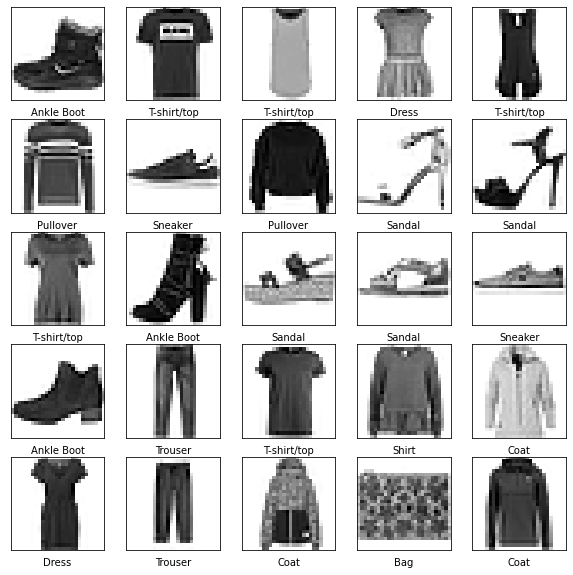

In [19]:
plt.figure(figsize = (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

** build the neural network model **
Architecture made up of layers: input, hidden and output layer

tf.keras.layers.Dense

In [24]:
# sequencing the layers
#Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  # convert to single row.  Neural networks 
    tf.keras.layers.Dense(128, activation='relu' ),  # hyperparameters number of nodes
    tf.keras.layers.Dense(10 )  # genera predictions in array of numbers
    #,tf.keras.layers.Softmax()   optionally can use softmax
])

images are in two dimension: height and width,  28x28 px

transform the images into one dimension  28x28 =>> 784px

In [21]:
# Example of flattening
a = np.array([[1,2],[3,4],[5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [22]:
a.flatten()

array([1, 2, 3, 4, 5, 6])

reason behind of softmax:
1. to convert the prediction of array of numbers into array of probabilities
2. crossentropy: loss metric for neural networks ;   actual prob  dist  predicted prob (need actual probability and predicted prob)  only numbers does not work

Compile the Model:  Tuning the model  (back propagation)
1. loss function: how accurate the model is during the training.  Minimize the loss  

2. optimization algos: optimizer; help the neural network in changing weights; direction of change and magnitude of change

3. Final metric: used to monitor the train but test data

In [25]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # convert output into probabilities array to do cross entropy
                metrics=['accuracy']
            ) # loss function

Train the model:

1. Feed the training data to the model:  train_images
2. the model will learn to associate images and labels
3. you will ask the model to make predictions on test data;  test_images
4. Verify the predictions by comparing them with pre-existing test labels

In [26]:
# feed the model with data:  fit method
model.fit(train_images, train_labels, epochs=10) # epochs number of rounds

# loss  cross entropy losses.  Accuracy keeps increasing
# 1875 number of batches    60 000 / 32 (each batch with 32 images) 

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4987 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3384 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2956 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2705 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2570 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2476 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

In [27]:
# evaluate the accuracy on test data

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc, test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.3506 - accuracy: 0.8765
0.8765000104904175 0.35063567757606506


if train_accuracy >>>   test accuracy,  overfitting   (Low bias and high variance)


make predictions

In [29]:
predictions = model.predict(test_images)
predictions[0]  # predictions are generate as numbers.  Probabilities are only used for cross entropy/loss calculation

313/313 [==============================] - 1s 2ms/step


array([ -9.995955  , -12.703344  , -14.300143  , -21.399519  ,
       -13.264849  ,  -4.5391145 ,  -8.810505  ,   0.69715756,
       -11.949305  ,   5.1596384 ], dtype=float32)

In [30]:
# extract the index position of the label
np.argmax(predictions[0]) # find the highest index

9

In [31]:
test_labels[0]

9

In [32]:
# generate predictions as array of probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])  #building a new architecutre from trained model

In [33]:
newprd = probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [35]:
newprd[0]

array([2.5882250e-07, 1.7266233e-08, 3.4971721e-09, 2.8873332e-12,
       9.8478017e-09, 6.0656555e-05, 8.4690879e-07, 1.1401498e-02,
       3.6700577e-08, 9.8853672e-01], dtype=float32)

In [36]:
np.argmax(predictions[0]) 

9